# Linear Regression - Boston Housing Dataset

*Boston Housing Dataset* contains 506 instances, having each one a total of 14 attributes, representing diverse information relative to houses located in various neighborhoods in Boston, Massachusetts. These attributes are the number of rooms in the house, the distance to the main Boston work areas, the percentage of lower status population or the time it has been occupied, among others. The target attribute, i.e. what it is going to be predicted, is the median value of homes in $1000s.

The Scikit-Learn library (sklearn), which brings many Machine Learning features, includes some well-known datasets, one of which is Boston Housing Dataset. So, the first thing we're going to do is import the libraries and the respective modules that are going to be used.

In [0]:
from sklearn.datasets import load_boston

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns 

The data loaded from sklearn contains a description of the dataset, stored in the DESCR attribute. We use the variables X and Y to store the data and the target, respectively, and we save the dimensions of the dataset in the variables n (number of samples) and p (attributes per sample).

In [107]:
boston_dataset = load_boston()

print(boston_dataset.DESCR)

X = boston_dataset.data
Y = boston_dataset.target

n, p = X.shape

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 1. Exploratory Data Analysis

The exploratory analysis must be performed before training the model, since it is a good practice to understand the relationship of the target variable with the rest of the attributes. In this step, we make use of the set of statistical and mathematical tools to obtain a better image of what our data represent.

There are many possibilities to initially explore the data, but for the sake of simplicity and to stick to the objective of the problem, we will study the relationship between the variables RM (Average number of rooms per dwelling) and the target, MEDV.  We graph a scatter plot with each variable in an axis that allows us to visualize some identifiable pattern:

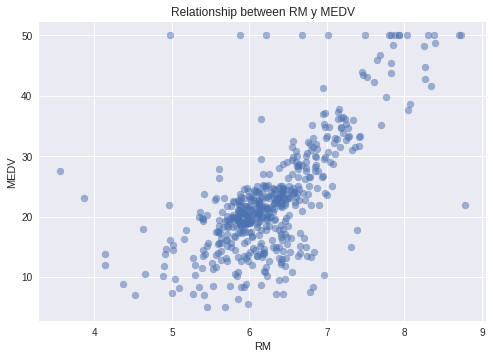

In [108]:
plt.title("Relationship between RM y MEDV")
plt.xlabel("RM")
plt.ylabel("MEDV")

plt.scatter(X[:,5], Y, alpha=0.5)  # We select all data from x axis and the 5th. column to allude the attribute RM
plt.show()

The brief analysis seems to be coherent and and confirms what indicates the scatter plot: there is a correlation between RM and MEDV (+0.695 between -1 and 1), which is completely logical, since it is normal that the price of a house increases as more rooms it has.

We can also use a statistical measure such as the correlation between the two variables to quantitatively check this relationship. The *corrcoef* function in numpy returns pearson product-moment correlation coefficients between the attributes. This correlation matrix can be plotted using the heatmap function from the seaborn library.

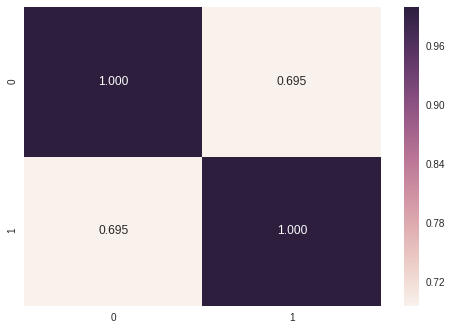

In [109]:
corrmat=np.corrcoef(X[:,5], Y)

sns.heatmap(corrmat, annot=True, fmt=".3f")
plt.show()

It can be answered, for example, which is the medium price of the houses whose average number of rooms oscillates between 5 and 6:

In [110]:
medp = np.mean(Y[np.logical_and(X[:,5] > 5, X[:,5] < 6)])
print("Mean value for 5 > RM > 6 :", medp*1000, " $")

Mean value for 5 > RM > 6 : 17551.5923566879  $


Finally, were are going to plot the distribution of the target variable MEDV.  In this histogram we detect an anomalous value peak in dwellings with an average value of exactly $50,000. This is possibly the result of the truncation of those home values higher than this amount.

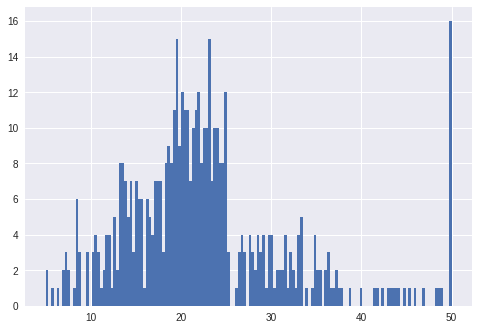

In [111]:
plt.hist(Y, bins=150)
plt.show()

## 2. Ordinary Least Squares

Once the initial exploratory analysis is done, we will proceed to implement and train our model. It is possible to adjust the linear regression line to the data using those values of the parameters obtained by means of the ***Ordinary Least Squares*** method. This method finds that the minimum of the ***Mean Squared Error*** function is at the point where its derivative is equal to 0. This is obtained by evaluating the following expression:

> > > > >  > > > $W = (X^TX)^{-1}X^TY$

To work in a vectorized form, it is necessary to expand the $X$ matrix with a first column of values assigned to $1$, which will serve to keep the term independent:


In [112]:
RM = X[:,5]
RM = RM[:, np.newaxis]  # We avoid losing the second dimension of the RM numpy array

identRM = np.hstack((np.ones((n,1)), RM))  # We enlarge X with a column vector of 1s

W = np.linalg.inv(identRM.T @ identRM) @ identRM.T @ Y  # Linear Regression by Ordinary Least Squares method

W = W[:, np.newaxis]
print(W)

[[-34.67062078]
 [  9.10210898]]


Thus, the Ordinary Least Squares method tells us that $W_0 = -34.67062078$ is the intercept and $W_1 = 9.10210898$ is the slope of the regression function. This is equal to saying that when you increase by 1 the number of rooms, then the value increases by \$9.1k, and, although it doesn't make sense, that a house with 0 rooms is worth \$-34.67k.

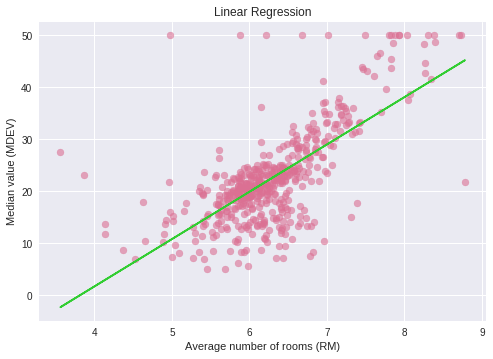

In [113]:
regressionFunction = lambda x: 9.10210898*x -34.67062078

plt.title("Linear Regression")
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Median value (MDEV)")
plt.scatter(RM, Y, alpha=0.6, c='palevioletred')
plt.plot(RM, regressionFunction(RM), c="limegreen")
plt.show()

To answer questions such as what will be the value of a house for an average number of 9 rooms, and also the average number of rooms that a house with an average value of \$45k could have, we can use either the lambda function (*regressionFunction*), or, directly, the matrix $W$ itself:

In [114]:
print("Estimated value for an average number of 9 rooms: ", ([1, 9] @ W)*1000, "$")  # The operator '@' is the cross (or vector) product. 
print("Average number of rooms for a $45k house: ", (45 - W[0])/W[1])

Estimated value for an average number of 9 rooms:  [47248.36005418] $
Average number of rooms for a $45k house:  [8.75298471]


Once the model is trained, it is finally possible to evaluate the quality of the predictions by implementing a function that has as arguments the vector of real output values $Y$ and the vector of predicted output $Y_P$, and compute the ***Mean Squared Error (MSE)***, which is defined by the expression:

> > > > >  > > >  $ \operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(Y_{Pi} - Y_i)^2. $

In [115]:
Y = Y[:, np.newaxis]

Yp = identRM @ W
ECM = lambda a, b: np.mean(np.power(a-b, 2))
print("MSE: %.8f" % ECM(Yp, Y))

MSE: 43.60055177


## 3. Scikit-learn's LinearRegression module

The **Sklearn** library implements, among many other Machine Learning models, the Linear Regression model. Therefore, it is possible to do the abovementioned in a shorter way. To train a Simple Linear Regression model with the same variables that we have used in the previous section, we will use the function ***LinearRegression()***, belonging to the ***linear_model*** module of ***sklearn***. We will also use the **mean_squared_error()** function from **sklearn.metrics** module, instead of using our own implementation. First of all, both functions must be imported:


In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

We train our model using the ***fit*** function, and once trained we can make any prediction with the ***predict*** function. There are times in which it is useful or necessary for the regression line to pass through the origin of coordinates. In this case, we would have to pass as argument to ***LineaRegression*** the parameter ***fit_intercept = False***. As in the present problem we do not need that the regression line crosses the point (0,0) no such assignment will be made, since by default it is assigned to ***True***. In the same way as in the previous section, we use the **MSE** to know how well the regression line adjusts to the set of points. As we can see, identical results are obtained:

In [117]:
linearModel = linear_model.LinearRegression()
linearModel.fit(RM, Y)

print("Estimated value for an average number of 9 rooms: ", float(linearModel.predict([[9]]))*1000, "$")

Ypred = linearModel.predict(RM)

print("MSE: %.8f" % mean_squared_error(Y, Ypred))

Estimated value for an average number of 9 rooms:  47248.36005418422 $
MSE: 43.60055177


It should be noted that, with the purpose of evaluating the model’s performance on unseen data and prevent model *overfitting*, it is a good practice to make a partition of this data. In other words, if you subdivide the data into one set with which you train the model and another set with which you only evaluate it, it is possible to check the robustness of the model and appreciate that it has not memorized those training data. The function **train_test_split** of the module **sklearn.model_selection** is commonly used for performing this partition.

However, for this particular dataset and/or problem, this partition has no effect on the reduction of the **MSE**. Clearly, the RM attribute explains linear relation to the target variable, MEDV. Thus, in this simple case, a linear regression model trained without data partition would work well in predicting the price of a dwelling based on its number of rooms. In other cases, where the relationship between the variables is much more complex, partitioning will be necessary, as it won't always exist a simple linear relation between 2 variables. We will see when the partition will be necessary in other projects exposed.



